# **Überblick über das Supermarket Sales Dataset**

Das Datenset enthät Daten aus drei Filialen.

* Invoice ID: Eindeutige Rechnungsnummer
* Branch & City: Filialen (A, B, C) und Städte (Yangon, Naypyitaw, Mandalay)
* Customer Type & Gender: Kundentyp (Member/Normal) und Geschlecht.          
* Product Line: Produktkategorie (z. B. “Health and beauty”)
* Unit Price & Quantity: Einzelpreis und Anzahl der gekauften Einheiten
* Tax 5% & Total: Steuer und Gesamtpreis
* Date & Time: Datum und Uhrzeit des Kaufs
* Payment: Zahlungsmethode (Bar, Kreditkarte, E-Wallet)
* Cogs (Cost of Goods Sold): Warenkosten
* Gross Margin % & Gross Income: Gewinnmarge und Bruttogewinn
* Rating: Kundenbewertung (1-10)

In [2]:
from google.colab import drive
import pandas as pd

# Google Drive mounten
drive.mount('/content/drive')

# Datei-Pfad
file_path = "/content/drive/MyDrive/supermarket_sales - Sheet1.csv"

# CSV laden
df = pd.read_csv(file_path)

# Kontrolle
df.head()

Mounted at /content/drive


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


**Allgemeine Informationen zu den Daten**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

**Anzahl fehlender Werte**

In [4]:
df.isnull().sum()

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0


## **Gesamtumsatz nach Produktlinie**

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-6-65d040248b48>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=df["Product line"], y=df["Total"], estimator=sum, ci=None)


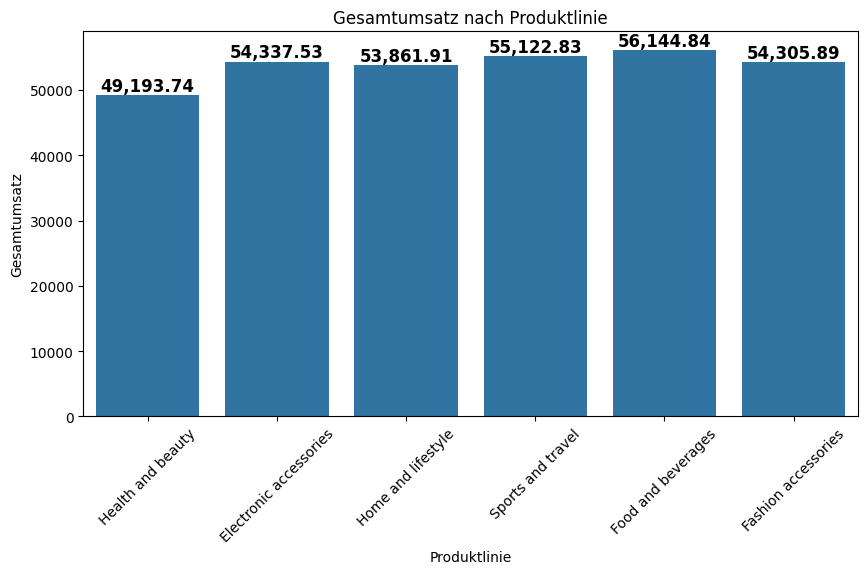

In [6]:
# Diagramm erstellen
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=df["Product line"], y=df["Total"], estimator=sum, ci=None)

# Werte über den Balken anzeigen
for p in ax.patches:
    ax.annotate(f"{p.get_height():,.2f}",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Achsenbeschriftungen
plt.xticks(rotation=45)
plt.title("Gesamtumsatz nach Produktlinie")
plt.xlabel("Produktlinie")
plt.ylabel("Gesamtumsatz")

# Ausgabe
plt.show()

Es ist zu erkennen das alle Produktlinien ähnlich viel Umsatz generieren. Der schwächste ist Health and Beauty und der stärkste Food and beverages.

## **Umsatz nach Stadt und Filiale**

<ipython-input-7-823753d94d7f>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=df["City"], y=df["Total"], hue=df["Branch"], estimator=sum, ci=None, palette=colors)
<ipython-input-7-823753d94d7f>:5: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  ax = sns.barplot(x=df["City"], y=df["Total"], hue=df["Branch"], estimator=sum, ci=None, palette=colors)


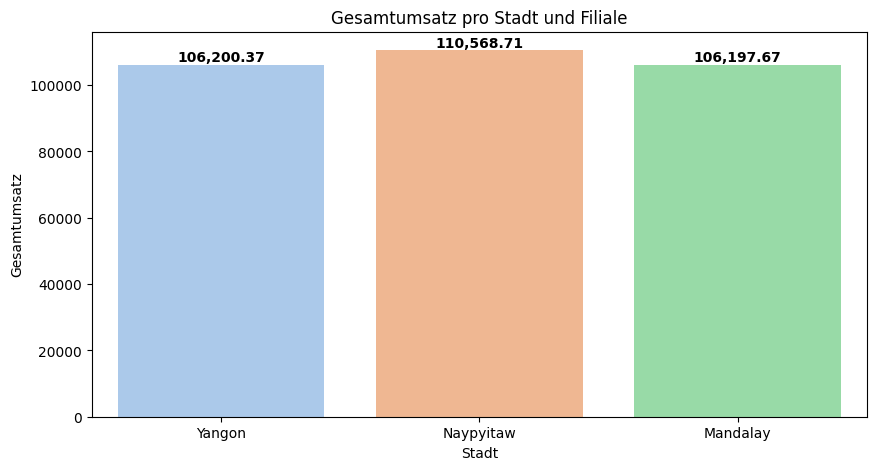

In [7]:
colors = sns.color_palette("pastel")

# Diagramm erstellen
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=df["City"], y=df["Total"], hue=df["Branch"], estimator=sum, ci=None, palette=colors)

# Legende entfernen
ax.legend_.remove()

# Werte über den Balken anzeigen (nur wenn > 0)
for p in ax.patches:
    if p.get_height() > 0:  # Nur Werte größer als 0 annotieren
        ax.annotate(f"{p.get_height():,.2f}",
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

# Achsenbeschriftungen
plt.title("Gesamtumsatz pro Stadt und Filiale")
plt.xlabel("Stadt")
plt.ylabel("Gesamtumsatz")

# Ausgabe
plt.show()

Auch hier ist gut zu erkennen das die Filialen sehr ausgeglichen im Gesamtumsatz sind.

## **Gibt es Stoßzeiten?**

<ipython-input-8-e8770e83ed13>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Hour"] = pd.to_datetime(df["Time"]).dt.hour


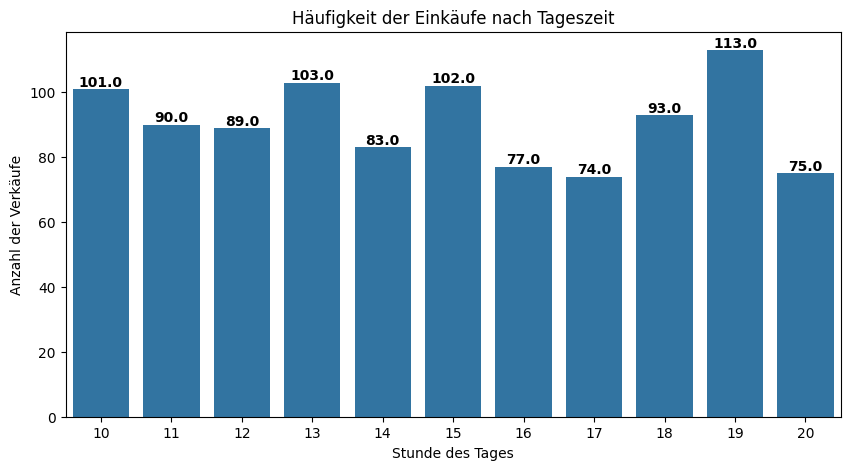

In [8]:
df["Hour"] = pd.to_datetime(df["Time"]).dt.hour

# Diagramm erstellen
plt.figure(figsize=(10, 5))
ax = sns.countplot(x=df["Hour"])

# Werte über den Balken anzeigen
for p in ax.patches:
    ax.annotate(f"{p.get_height()}",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Achsenbeschriftungen
plt.title("Häufigkeit der Einkäufe nach Tageszeit")
plt.xlabel("Stunde des Tages")
plt.ylabel("Anzahl der Verkäufe")

# Ausgabe
plt.show()

Das Diagramm zeigt deutliche Unterschiede in der Einkaufsaktivität über den Tag hinweg. Der höchste Wert tritt um 19 Uhr auf, was darauf hindeutet, dass viele Menschen ihre Einkäufe nach Feierabend erledigen. Dies könnte daran liegen, dass Berufstätige und Studierende erst am Abend Zeit haben, einkaufen zu gehen.

Am Nachmittag, insbesondere zwischen 14 und 16 Uhr, ist die Aktivität eher gering. Eine mögliche Erklärung dafür ist, dass viele Menschen zu dieser Zeit arbeiten, studieren oder andere Verpflichtungen haben. Der Vormittag zeigt relativ konstante, aber etwas niedrigere Werte, was darauf schließen lässt, dass einige Kunden ihre Einkäufe frühzeitig erledigen, bevor ihr Tagesablauf beginnt. Insgesamt lässt sich erkennen, dass der Einkaufszeitpunkt stark mit den täglichen Routinen der Menschen verknüpft ist.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Kopie des DataFrames erstellen
df_encoded = df.copy()

# Spalten in Zahlen umwandeln
for col in ["Product line", "Payment", "Customer type"]:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# variable definieren: Rating "hoch" (7-10) und "niedrig" (4-6)
df_encoded["High Rating"] = (df["Rating"] >= 7).astype(int)

# Features
X = df_encoded[["Product line", "Payment", "Customer type", "Quantity", "Total"]]

# Zielvariable
y = df_encoded["High Rating"]

# Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Modell erstellen und trainieren
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Genauigkeit testen
score = model.score(X_test, y_test)
print(f"Modellgenauigkeit: {score:.2f}")

Modellgenauigkeit: 0.48


In [15]:
# Beispiel
new_customer = [[2, 1, 1, 5, 250]]

# Vorhersage
prediction = model.predict(new_customer)

# Zahlenwerte in ursprüngliche Kategorien umwandeln
rating_mapping = {0: "Niedrige Bewertung (4-6)", 1: "Hohe Bewertung (7-10)"}
predicted_rating = rating_mapping[prediction[0]]

print(f"Vorhergesagte Bewertung: {predicted_rating}")

Vorhergesagte Bewertung: Hohe Bewertung (7-10)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
